objectives
* revisiting outliers
* clustring - DBSCAN
<hr>

### 07-04-2020


Outlairs - Data not part of general representation

In [58]:
from sklearn.datasets import make_blobs

In [59]:
X,_ = make_blobs(n_features = 2,centers=2,cluster_std=2,n_samples=1000)

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:,0],X[:,1],s=5)
plt.xlabel("X1")
plt.ylabel('X2')


Important notes
* not all data will be part of cluster.
* there will be some data clusterless
* DBSCAN can identify clusterless data as well

In [61]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [62]:
from sklearn.cluster import DBSCAN


In [63]:
ss = StandardScaler()

In [64]:
X_tf = ss.fit_transform(X)

In [65]:
dbscan = DBSCAN(eps = .5)

In [66]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [67]:
dbscan.labels_

array([ 0,  1,  0, -1,  1, -1, -1,  0,  2,  0,  0,  1,  0,  0,  1, -1,  0,
        1, -1, -1,  0,  0,  0,  1, -1,  0,  3, -1,  0,  0,  0,  0, -1,  0,
        2, -1,  4,  1,  0,  0,  1,  1,  0,  0,  1, -1,  0,  1,  1,  0,  0,
        1,  0,  1,  1,  1,  1,  0,  0,  1,  1,  1, -1,  1,  0,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  0,  2,  0,  1,  0,  1,  0,
        0,  1,  3,  0,  1,  0, -1,  0,  1,  1,  1,  1,  0,  0,  0,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  0,  0,  1, -1,  1, -1,  0,
        1,  0,  0,  0,  1,  1,  1, -1, -1,  0,  1, -1,  1,  0, -1,  0,  1,
        1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  3, -1,  0,  1,  0,
       -1,  1,  1,  0,  1,  0, -1, -1,  1,  1,  0,  1, -1,  0,  0, -1,  1,
       -1,  1,  1,  1, -1,  1,  1,  0,  0,  1,  1,  1,  0, -1,  0,  0, -1,
        0, -1,  1,  0,  0,  1,  1,  1, -1,  1,  1,  1,  1,  1,  0,  0,  1,
       -1, -1,  1,  3,  1,  0,  0, -1,  1,  1,  1, -1,  1,  1,  0, -1, -1,
        0,  1,  0,  1,  0

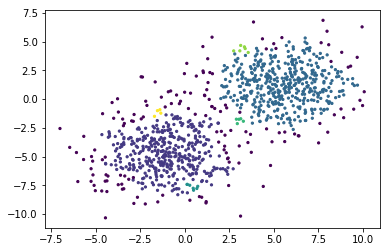

In [68]:
plt.scatter(X[:,0],X[:,1],s=5,c=dbscan.labels_)

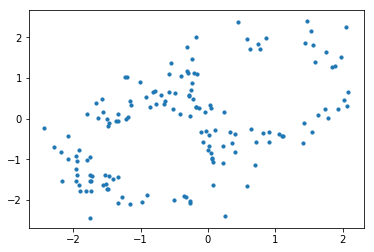

In [69]:
plt.scatter(X_tf[dbscan.labels_ == -1][:,0], X_tf[dbscan.labels_ == -1][:,1],s=10)

In [70]:
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps = 0.3,min_samples = 10).fit(X)

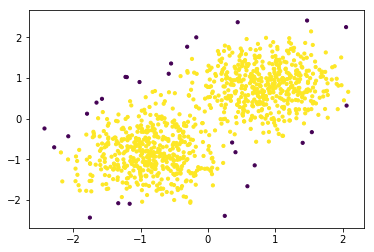

In [71]:
plt.scatter(X[:,0],X[:,1],s = 10, c = db.labels_)

* eps : the distance which it will cosider as neighbour & form cluster

In [72]:
import pandas as pd

In [73]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [74]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [75]:
house_data_tf = ss.fit_transform(house_data)

C:\Users\saket\Anaconda333\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\saket\Anaconda333\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [76]:
dbscan = DBSCAN(eps = .3,min_samples=10)

In [77]:
dbscan.fit(house_data_tf)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [78]:
dbscan

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=None, p=None)

In [79]:
sum(dbscan.labels_ == -1)

630

In [80]:
house_data[dbscan.labels_  == -1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
6,1127.886,11,12,4,2,2,148000
7,1352.040,5,7,3,2,1,58000
8,757.854,5,14,1,0,1,48000
9,1152.792,10,12,3,2,2,45000
10,1423.200,4,5,4,2,2,65000
11,668.904,4,11,1,1,1,31000


In [81]:
house_data['cluster']  = dbscan.labels_

Text(0, 0.5, 'Price')

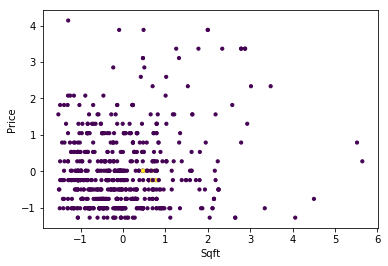

In [82]:
plt.scatter(house_data_tf[:,0],house_data_tf[:,1],s = 10,c = dbscan.labels_)
plt.xlabel("Sqft")
plt.ylabel("Price")

### master thee clustering topics
* KMeans
* Aggo 
* DBSCAn